In [ ]:
!nvidia-smi

Tue Jan 23 22:51:09 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics

# Install YOLOv5n

In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()

# Train YOLOv5 Model

In [ ]:
!pip install roboflow

In [ ]:
from roboflow import Roboflow

In [ ]:
rf = Roboflow(api_key="B0gU8fg7HPtyAhhTOtyG")
project = rf.workspace("viad-optics-senior-design").project("senior-design-viad")
dataset = project.version(4).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Senior-Design-VIAD-4 in yolov5pytorch:: 100%|██████████| 68122/68122 [00:14<00:00, 4675.77it/s] 


In [ ]:
!yolo task=detect mode=train model=yolov5nu.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

100% 5.27M/5.27M [00:00<00:00, 106MB/s]
Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov5nu.pt, data=/content/Senior-Design-VIAD-4/data.yaml, epochs=20, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save

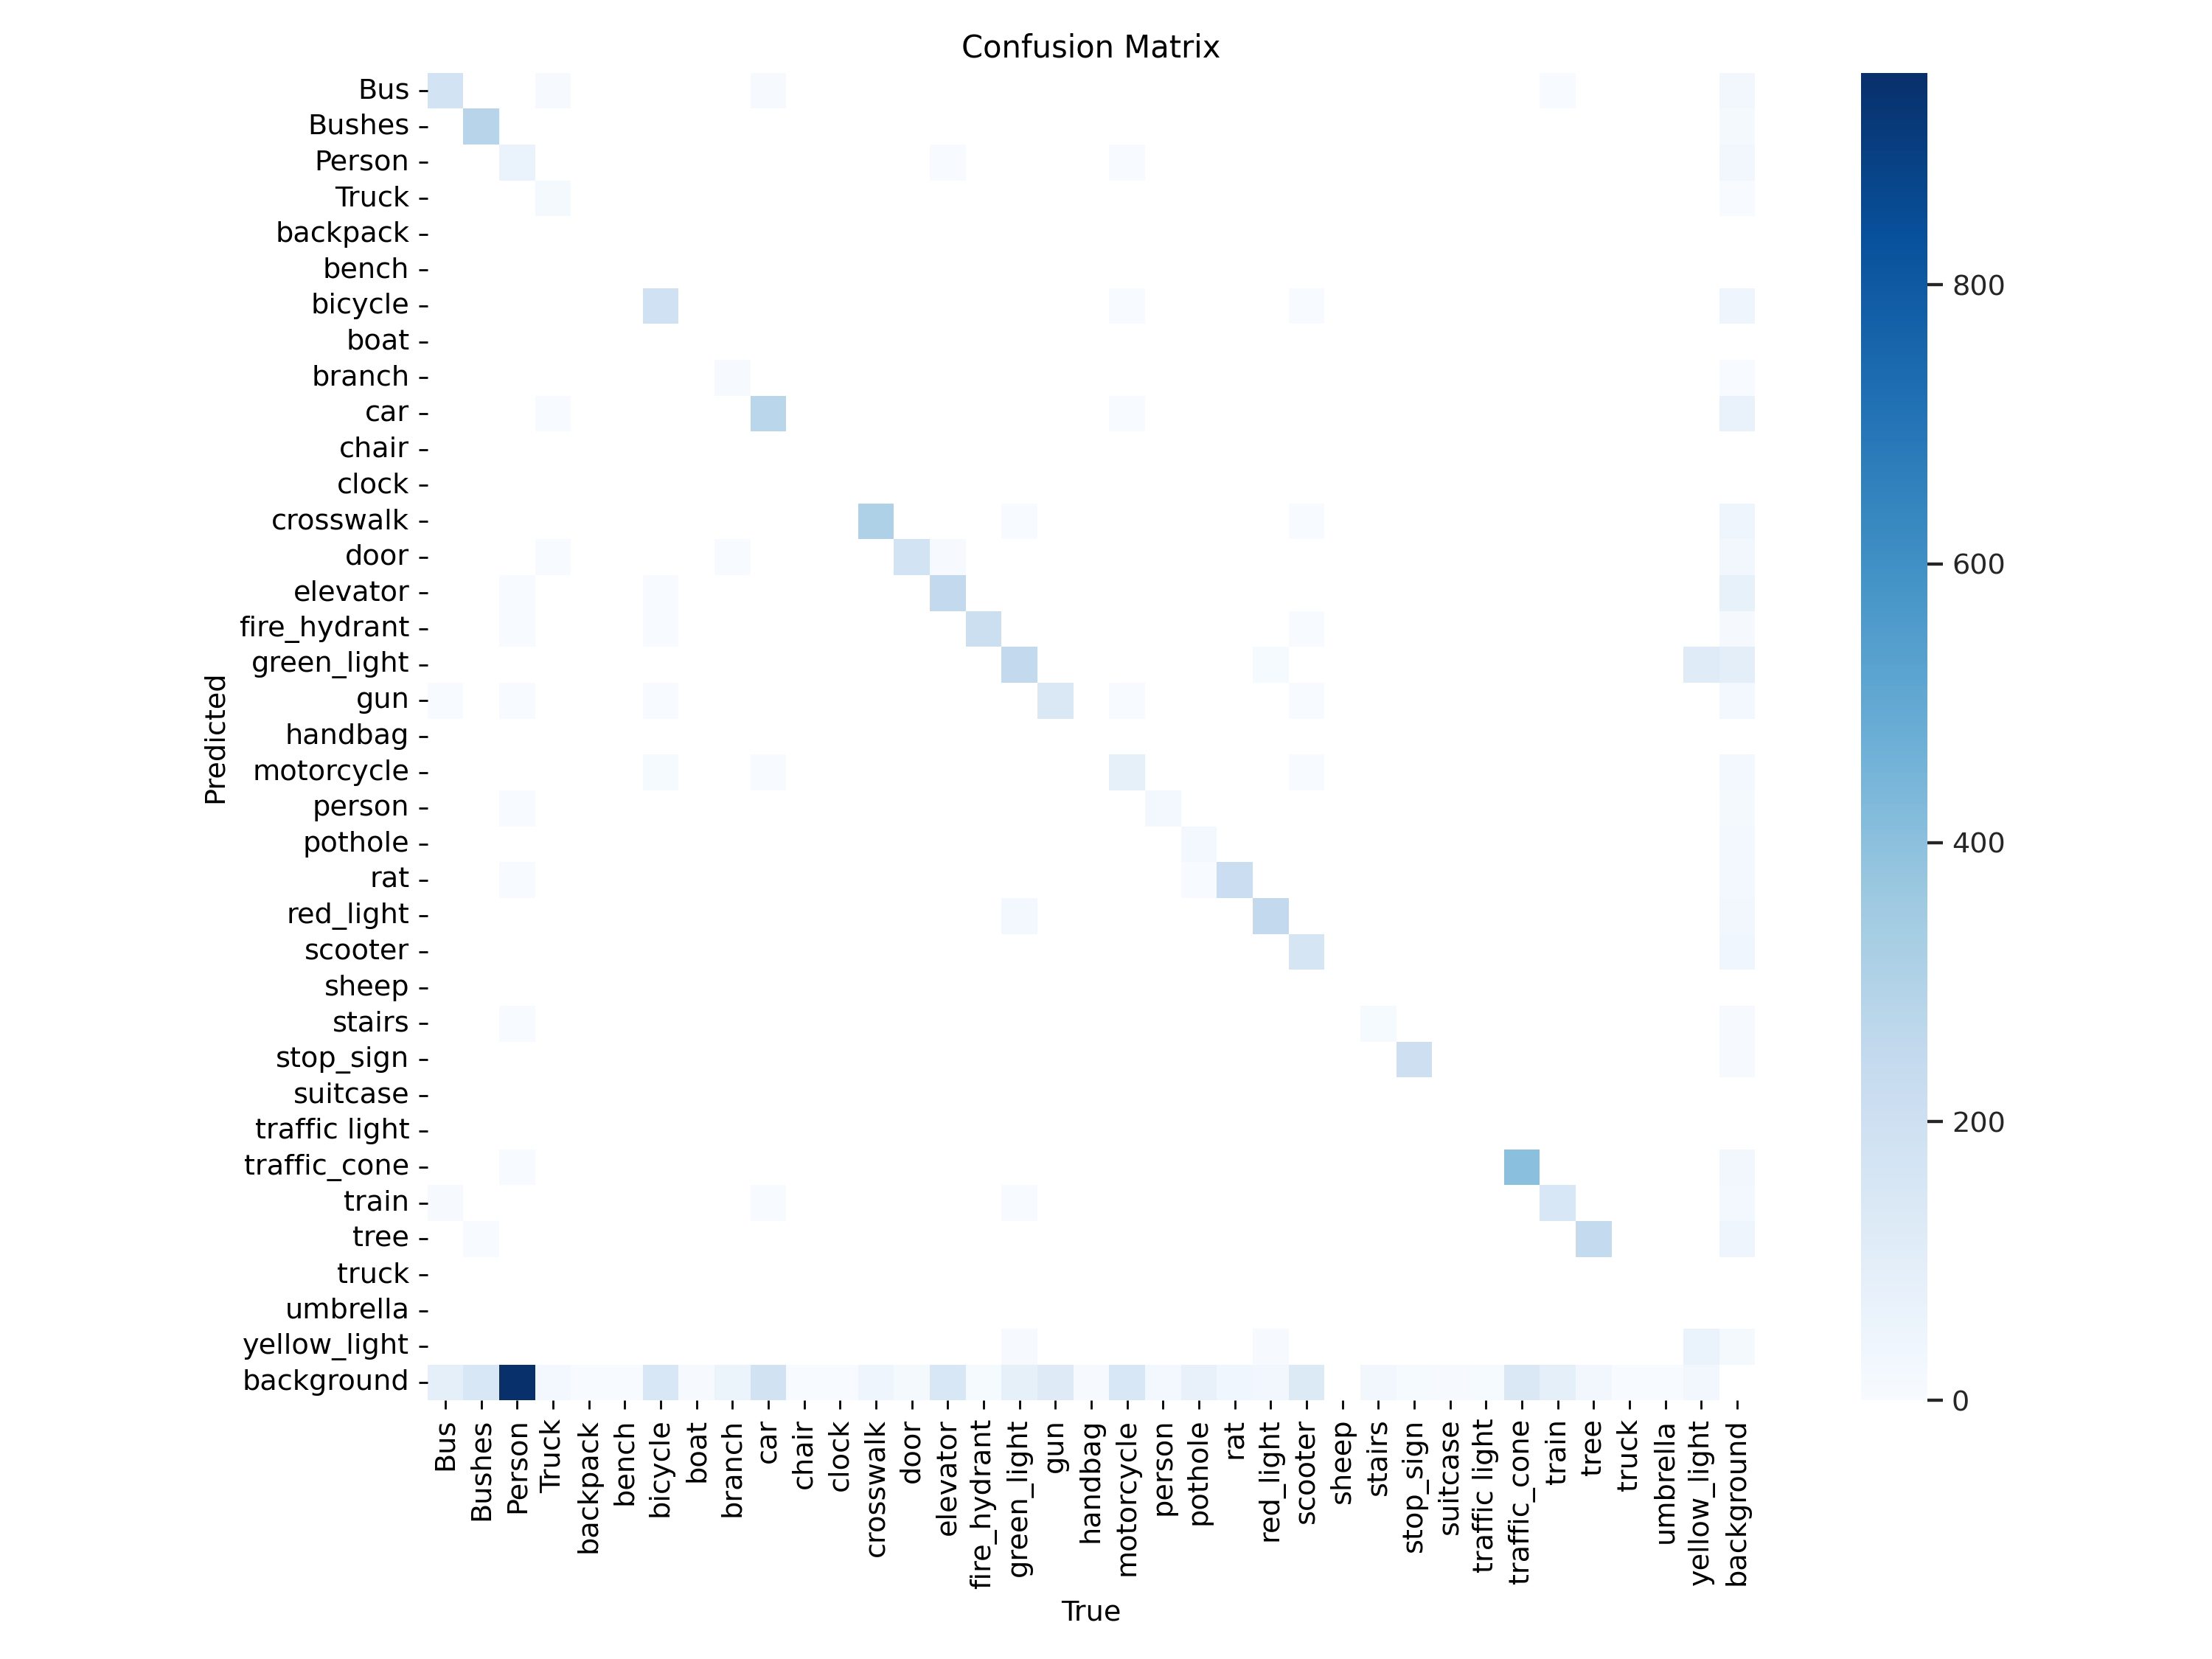

In [ ]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

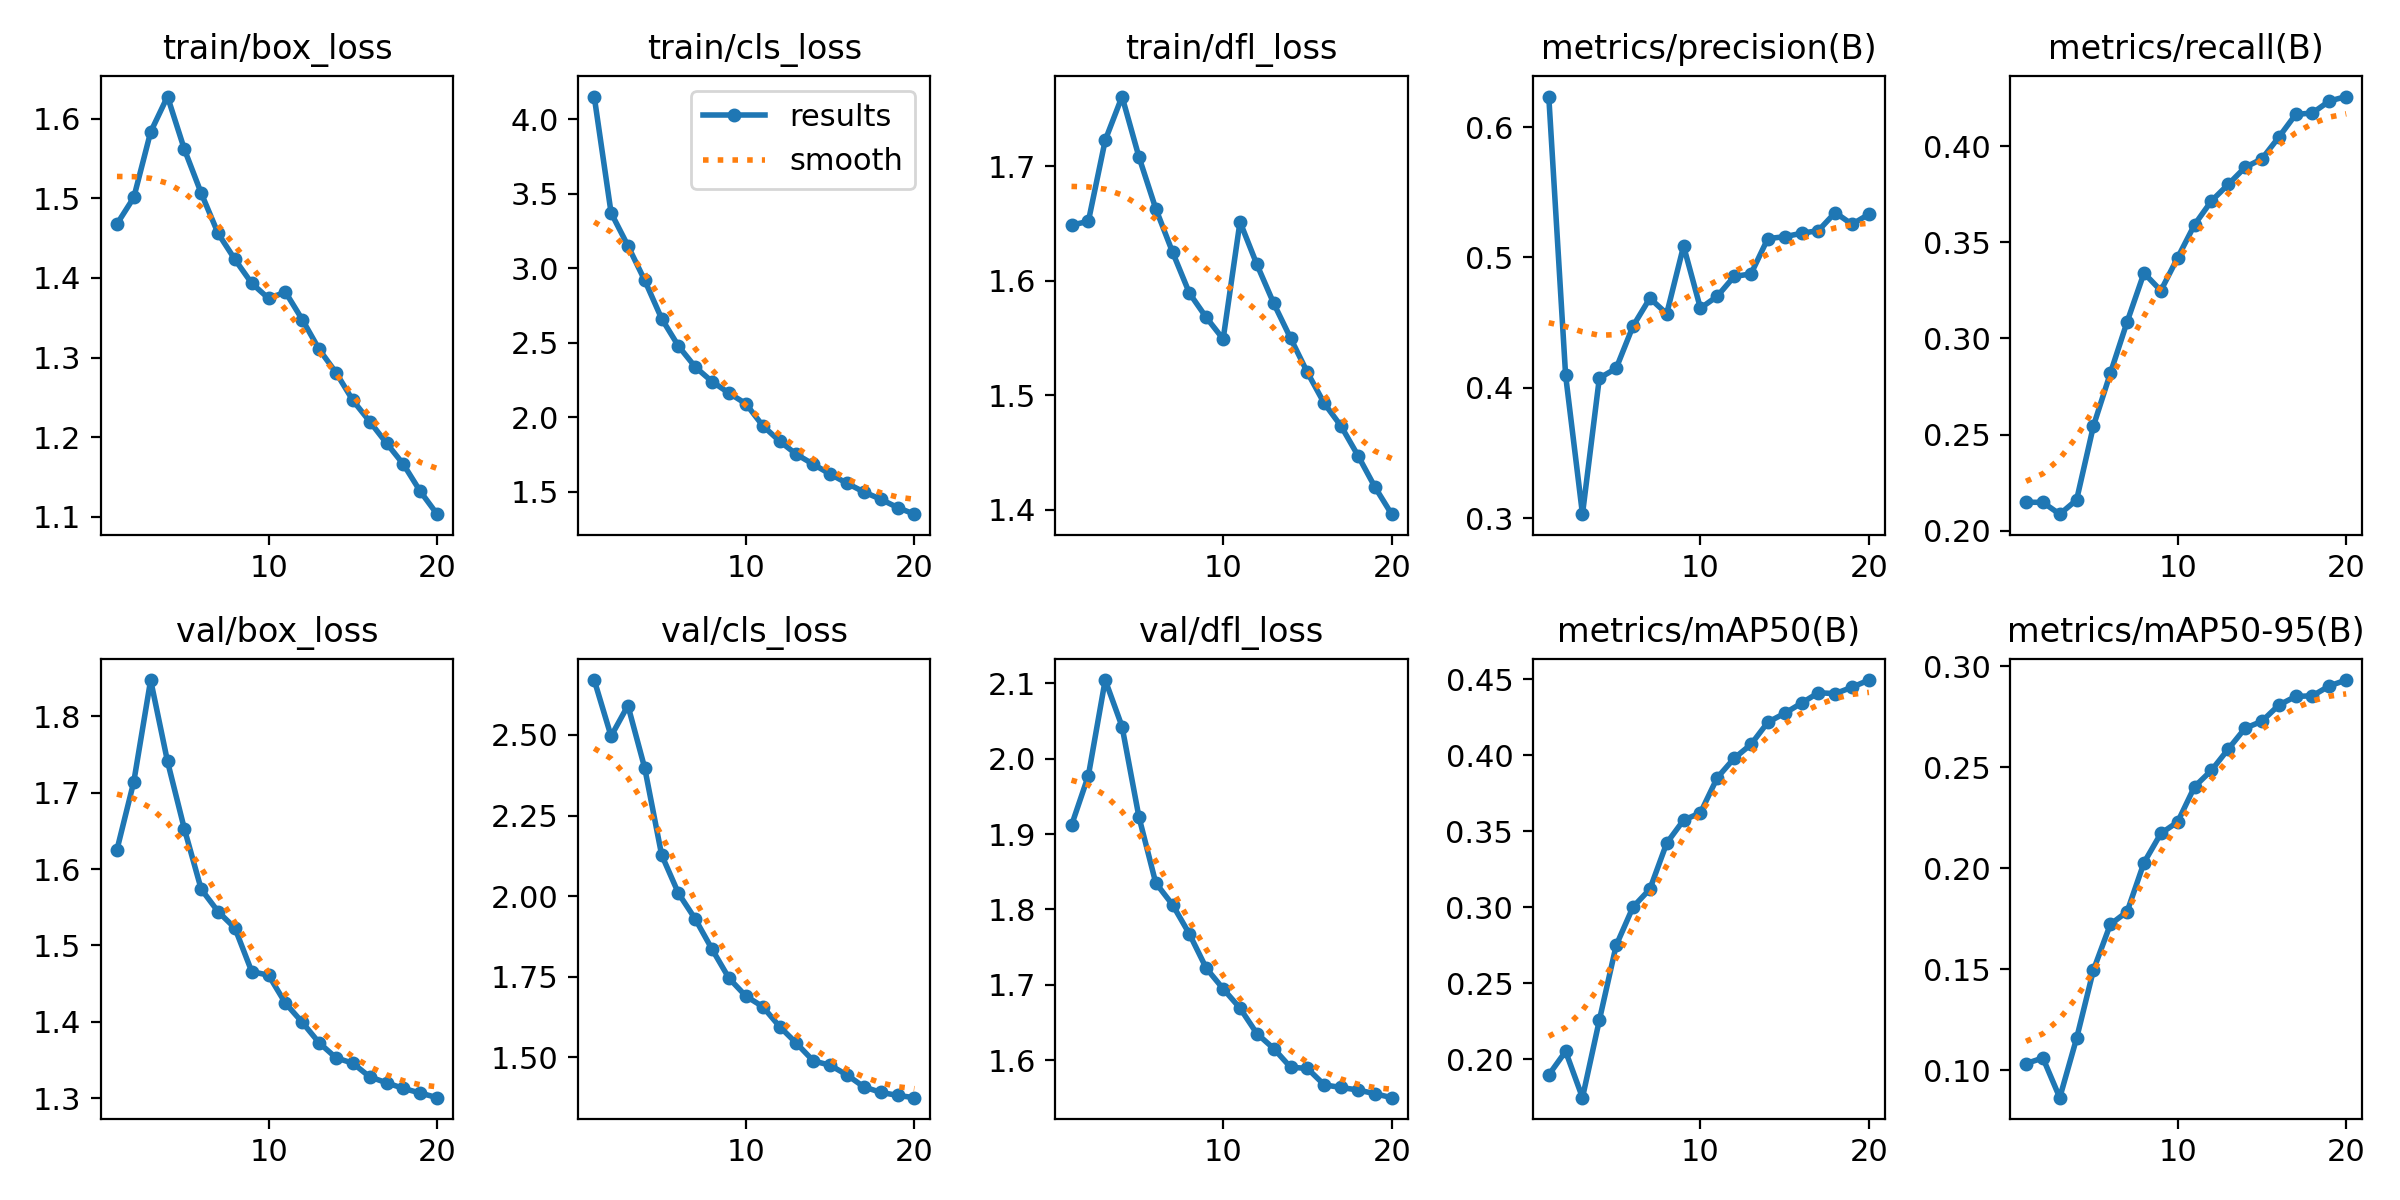

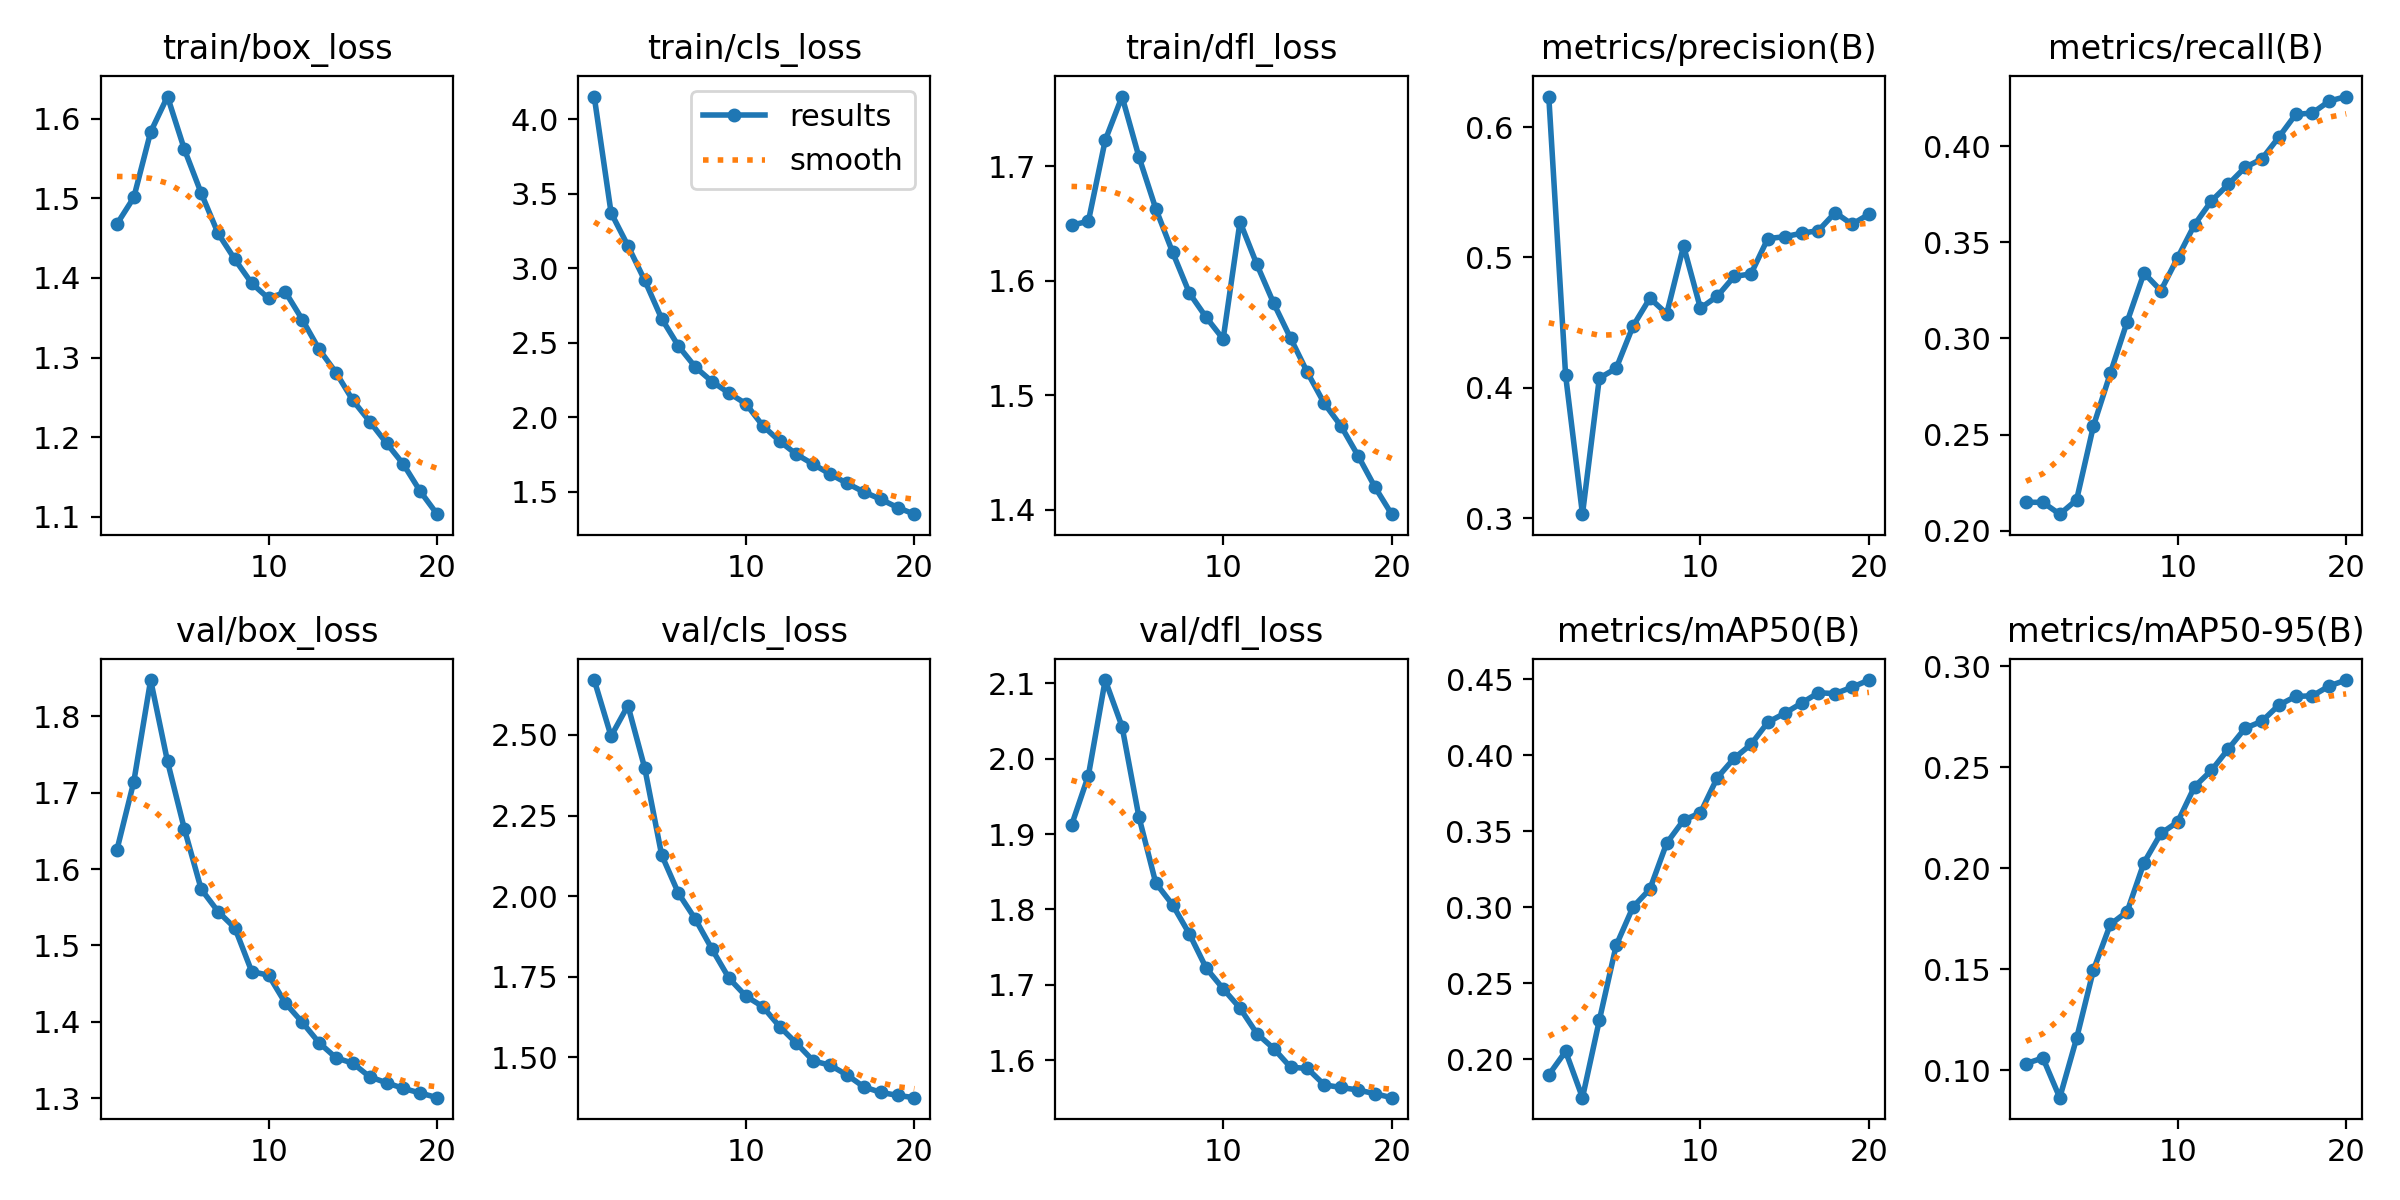

In [ ]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv5n summary (fused): 193 layers, 2509964 parameters, 0 gradients, 7.1 GFLOPs
val: Scanning /content/Senior-Design-VIAD-4/valid/labels.cache... 4246 images, 57 backgrounds, 0 corrupt: 100% 4246/4246 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/Senior-Design-VIAD-4/valid/images/4_z8126b7d060d92d74599e0618_f105bec8d65461b60_d20170228_m031732_c001_v0001038_t0052_png.rf.3c6685fe5b0dcd84d33b5279a57cc699.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /content/Senior-Design-VIAD-4/valid/images/4_z8126b7d060d92d74599e0618_f105bec8d654623bd_d20170228_m032421_c001_v0001038_t0052_png.rf.280ab928fab2e9d377caa0f0a47f1246.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/Senior-Design-VIAD-4/valid/images/4_z8126b7d060d92d74599e0618_f109cae5016f22c00_d20170225_m202920_c001_v0001038_t0018_png.rf.2acb28dd6793b4fc86c4b450d5af368a.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /content/Senior-Design-VIAD-4/vali

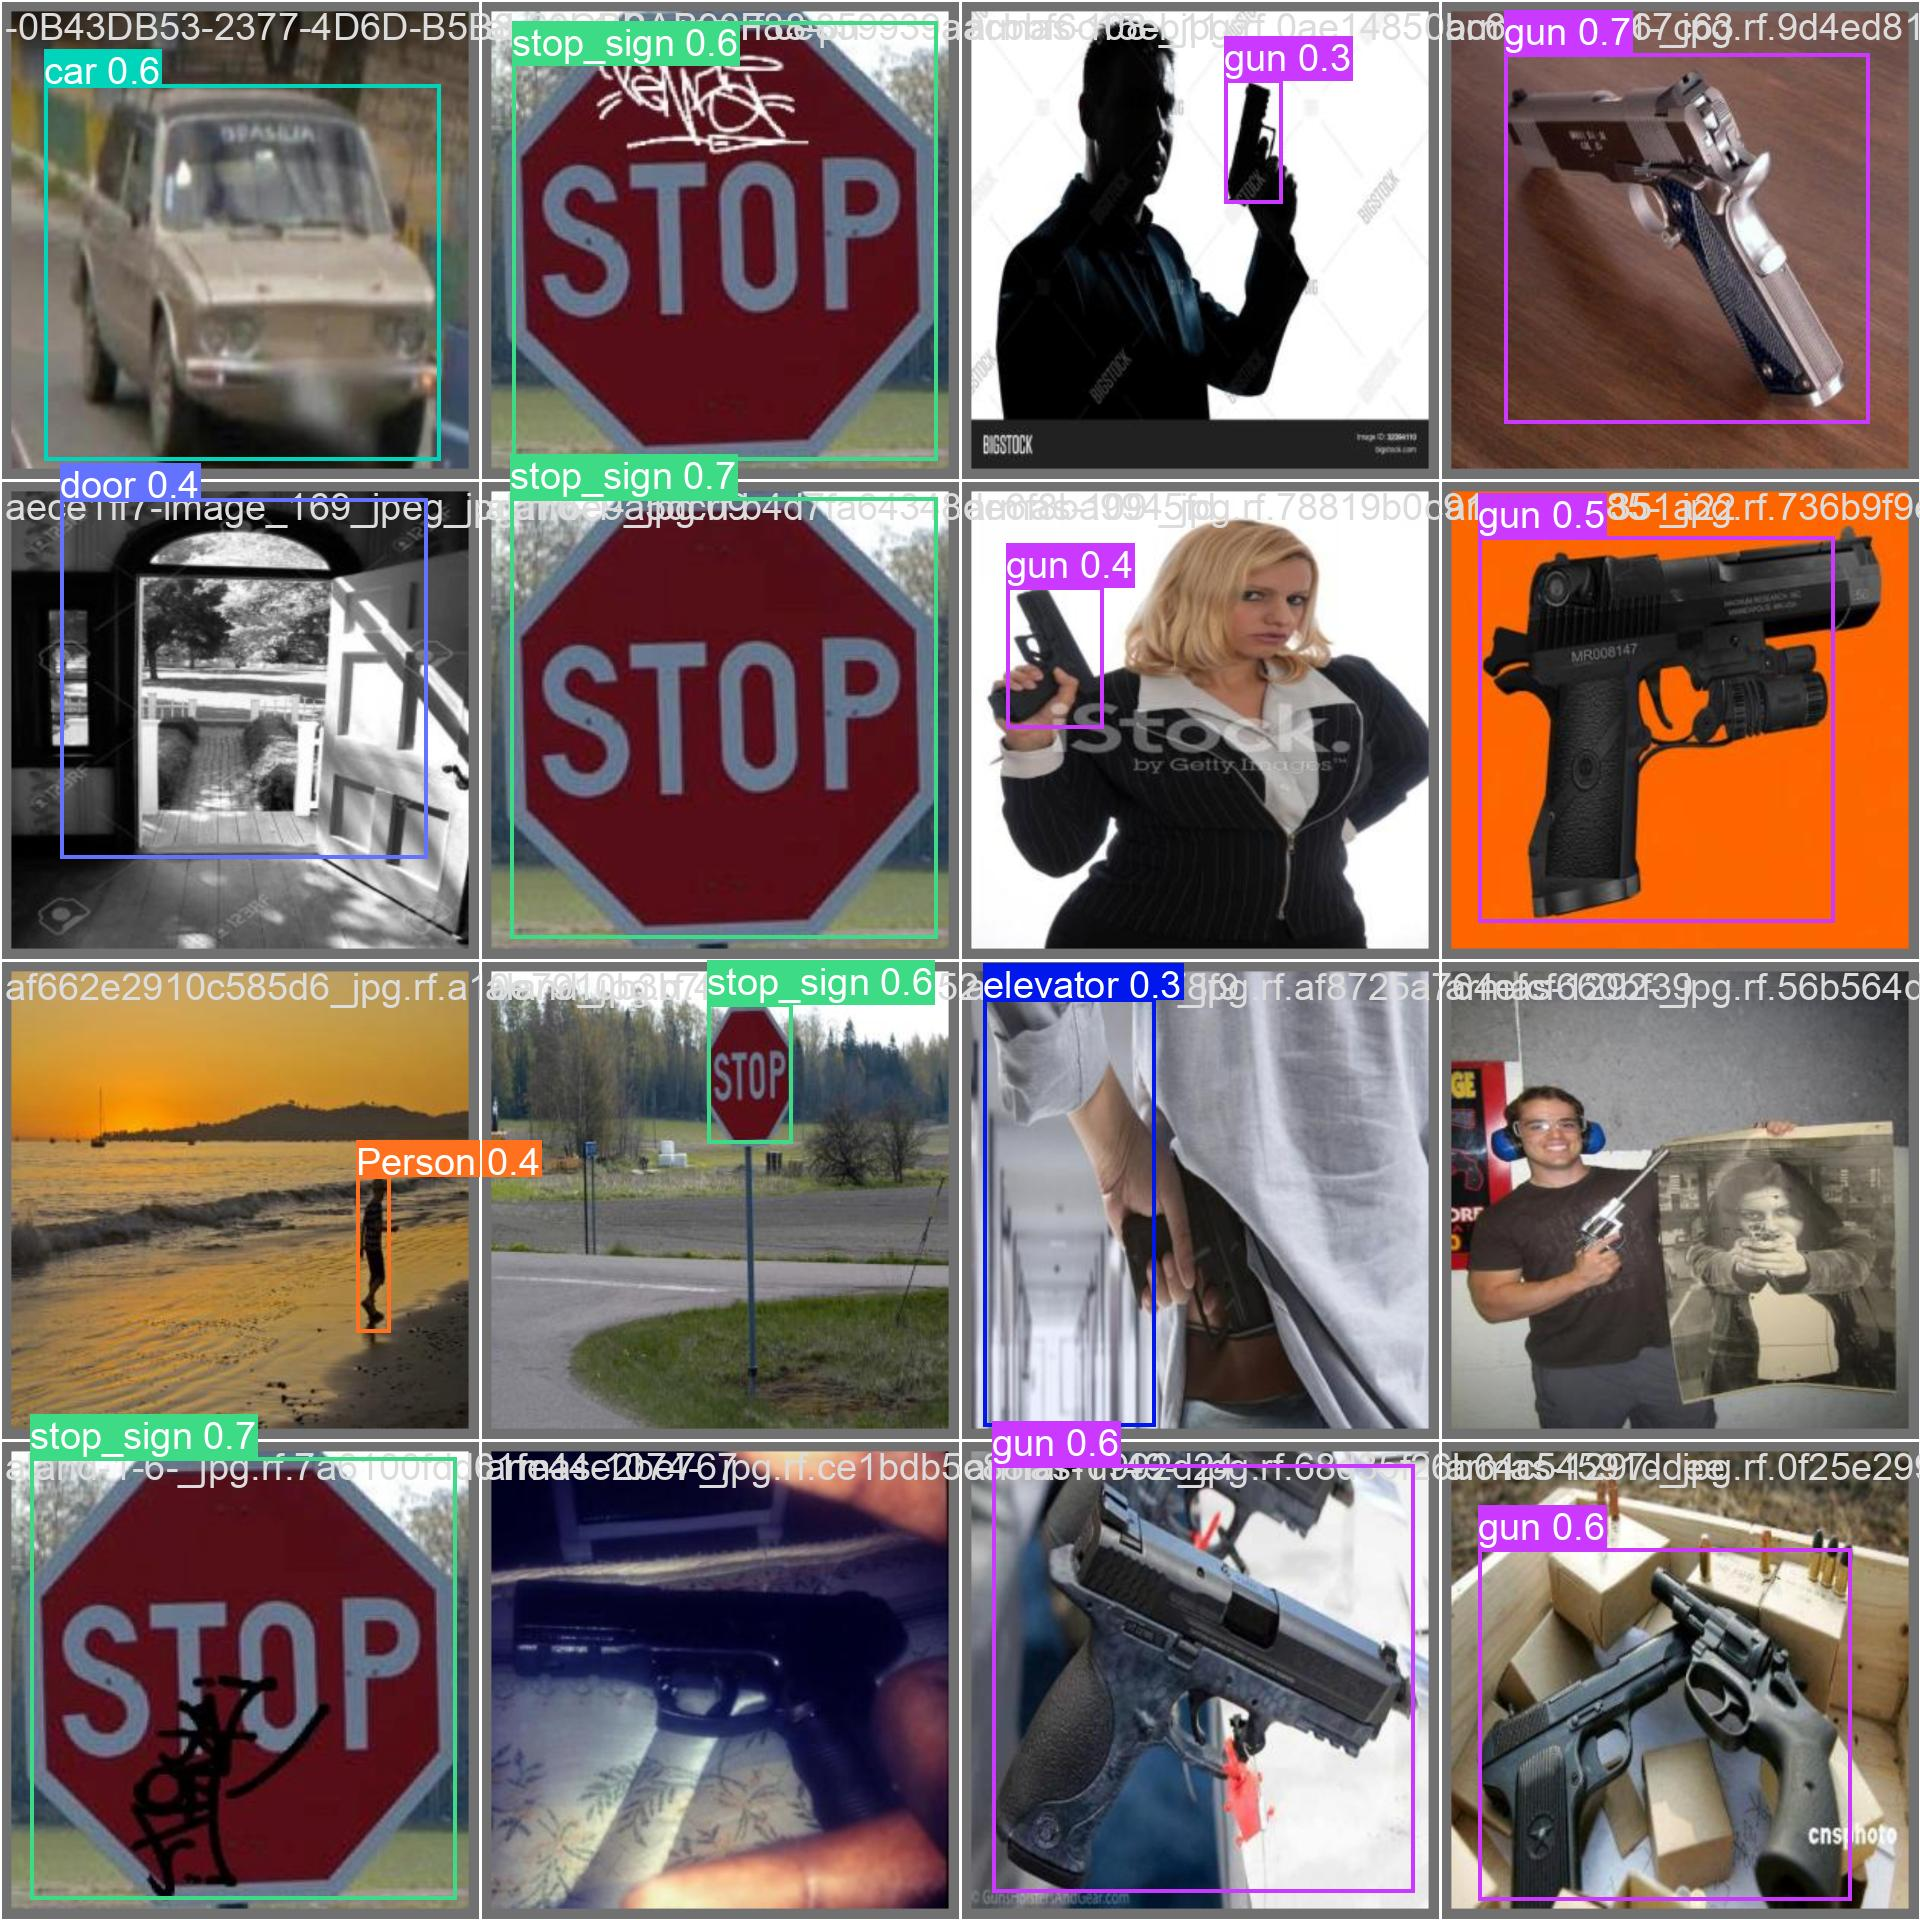

In [ ]:
import glob
from IPython.display import Image,display

for image_path in glob.glob(f'/content/runs/detect/train/val_batch0_pred.jpg'):
  display(Image(filename=image_path, height=600))
  print("\n")

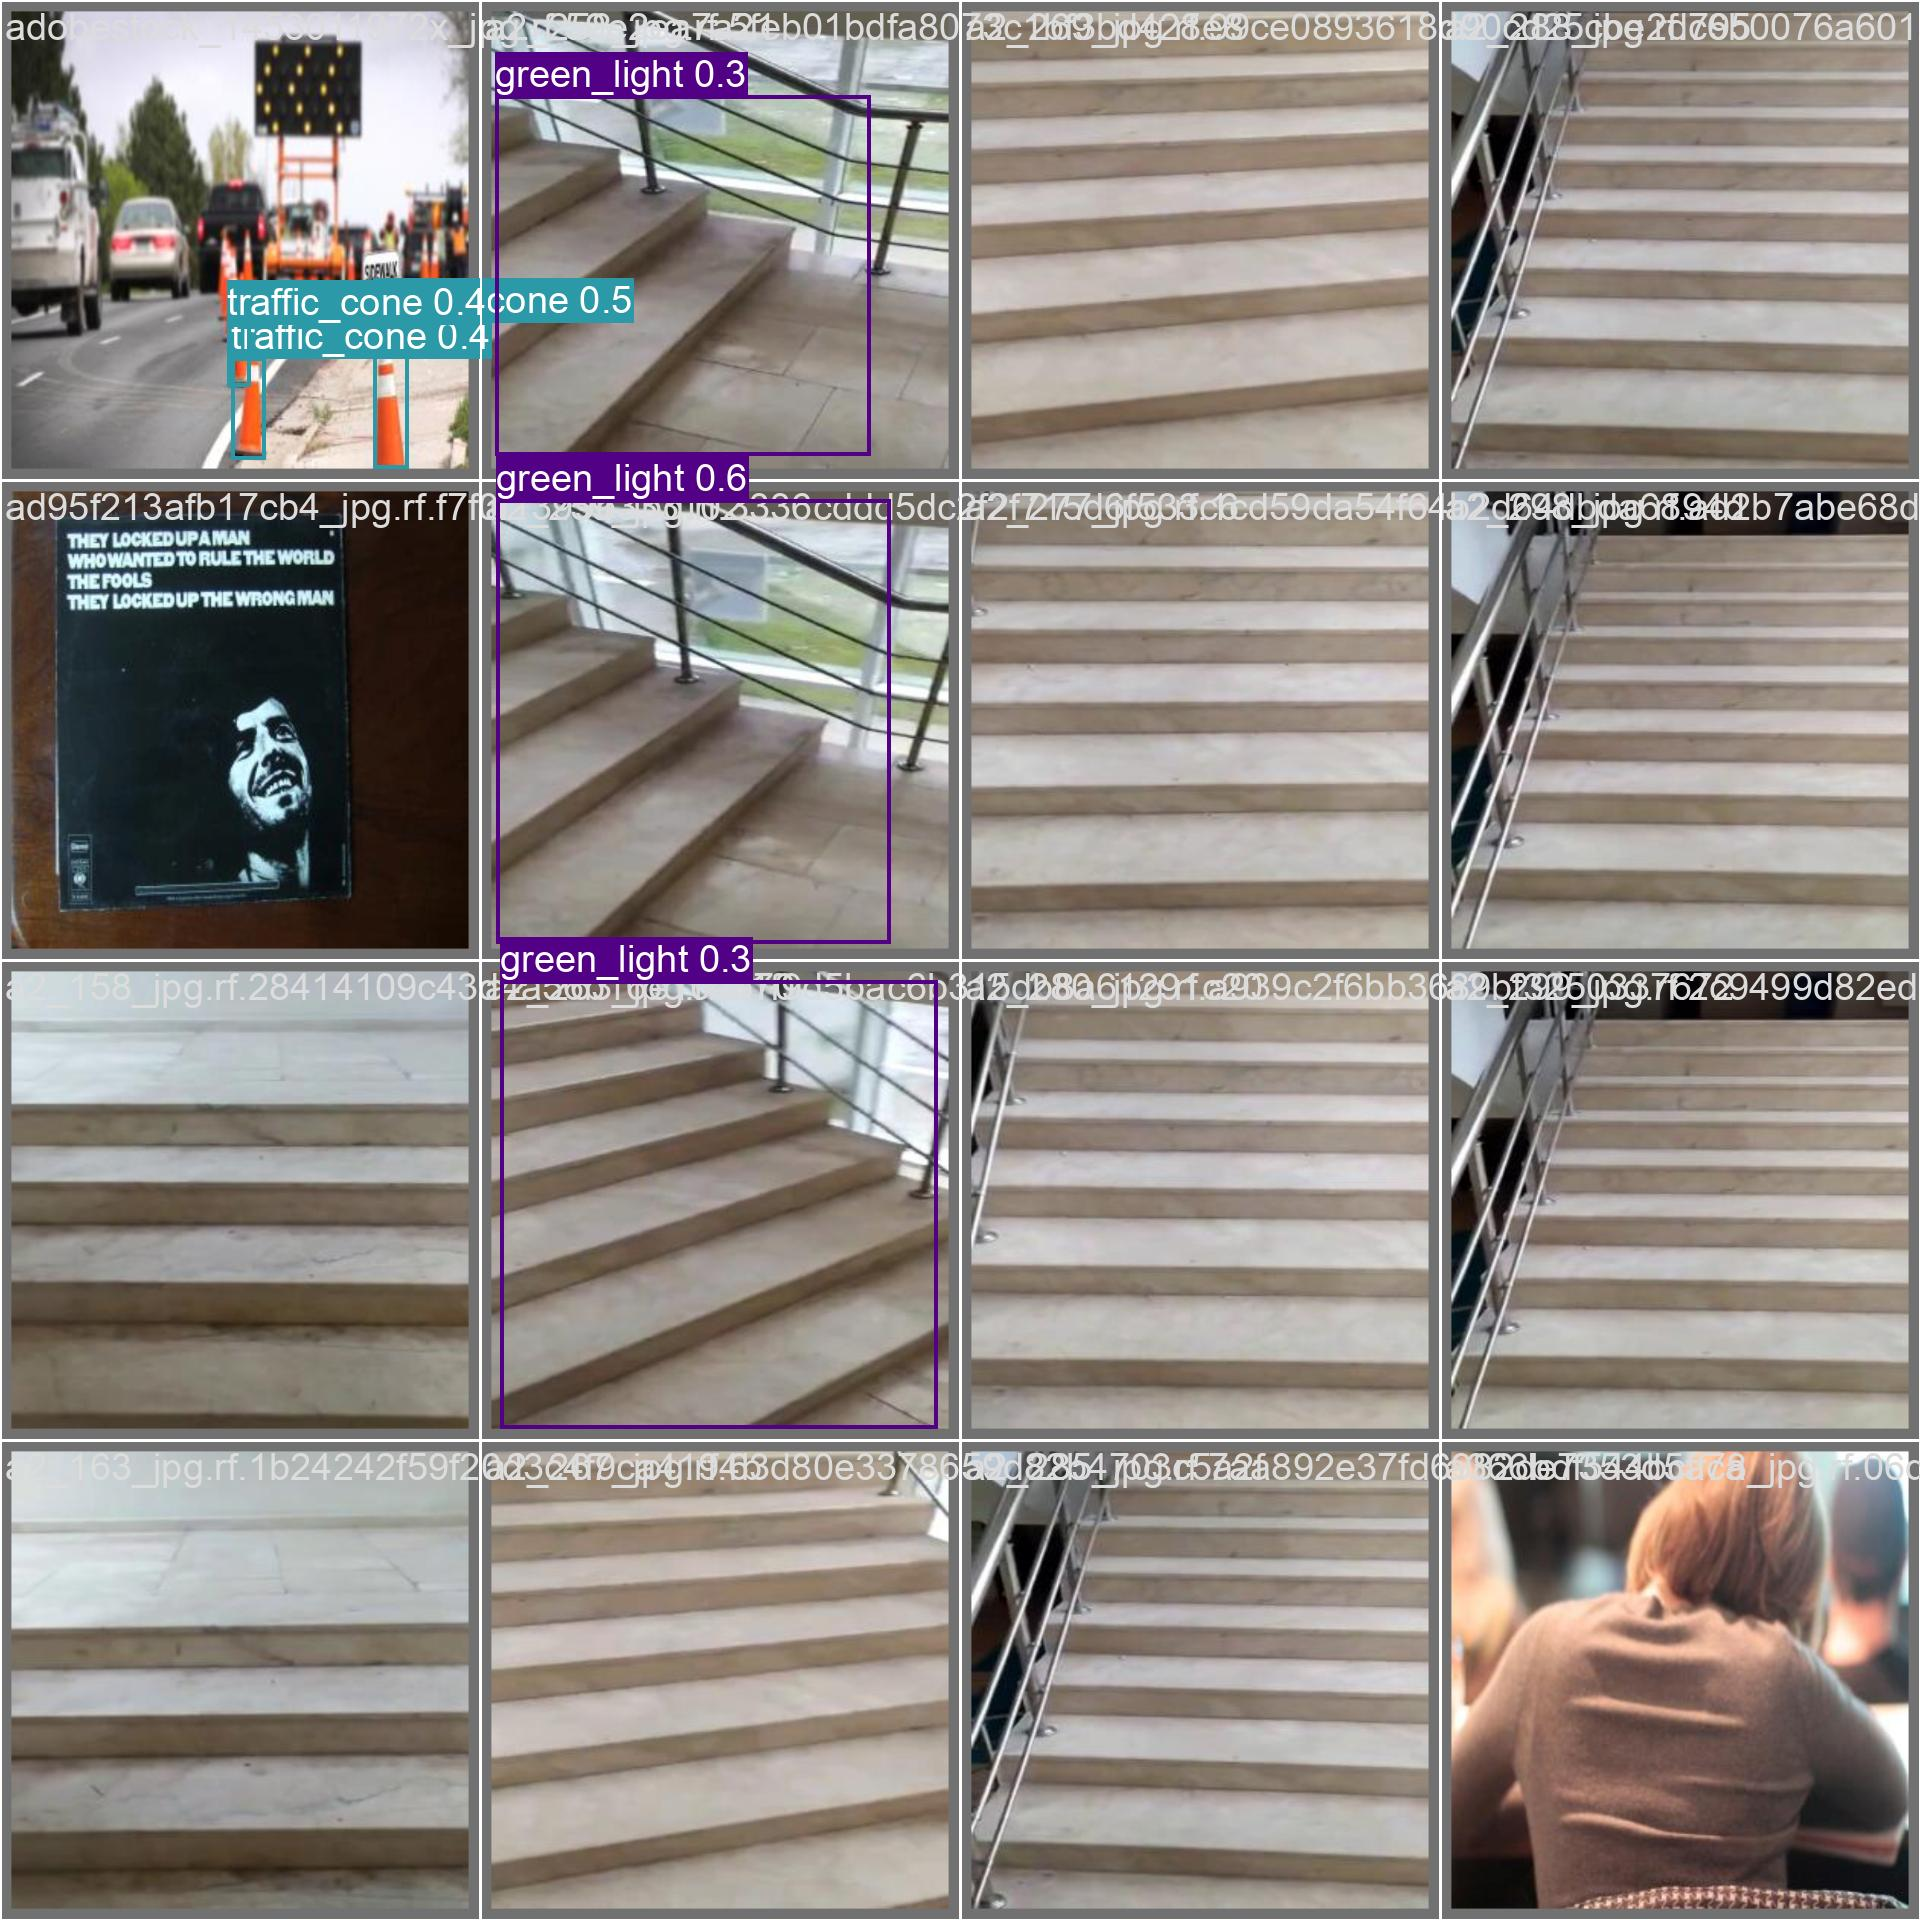

In [ ]:
import glob
from IPython.display import Image,display

for image_path in glob.glob(f'/content/runs/detect/train/val_batch1_pred.jpg'):
  display(Image(filename=image_path, height=600))
  print("\n")

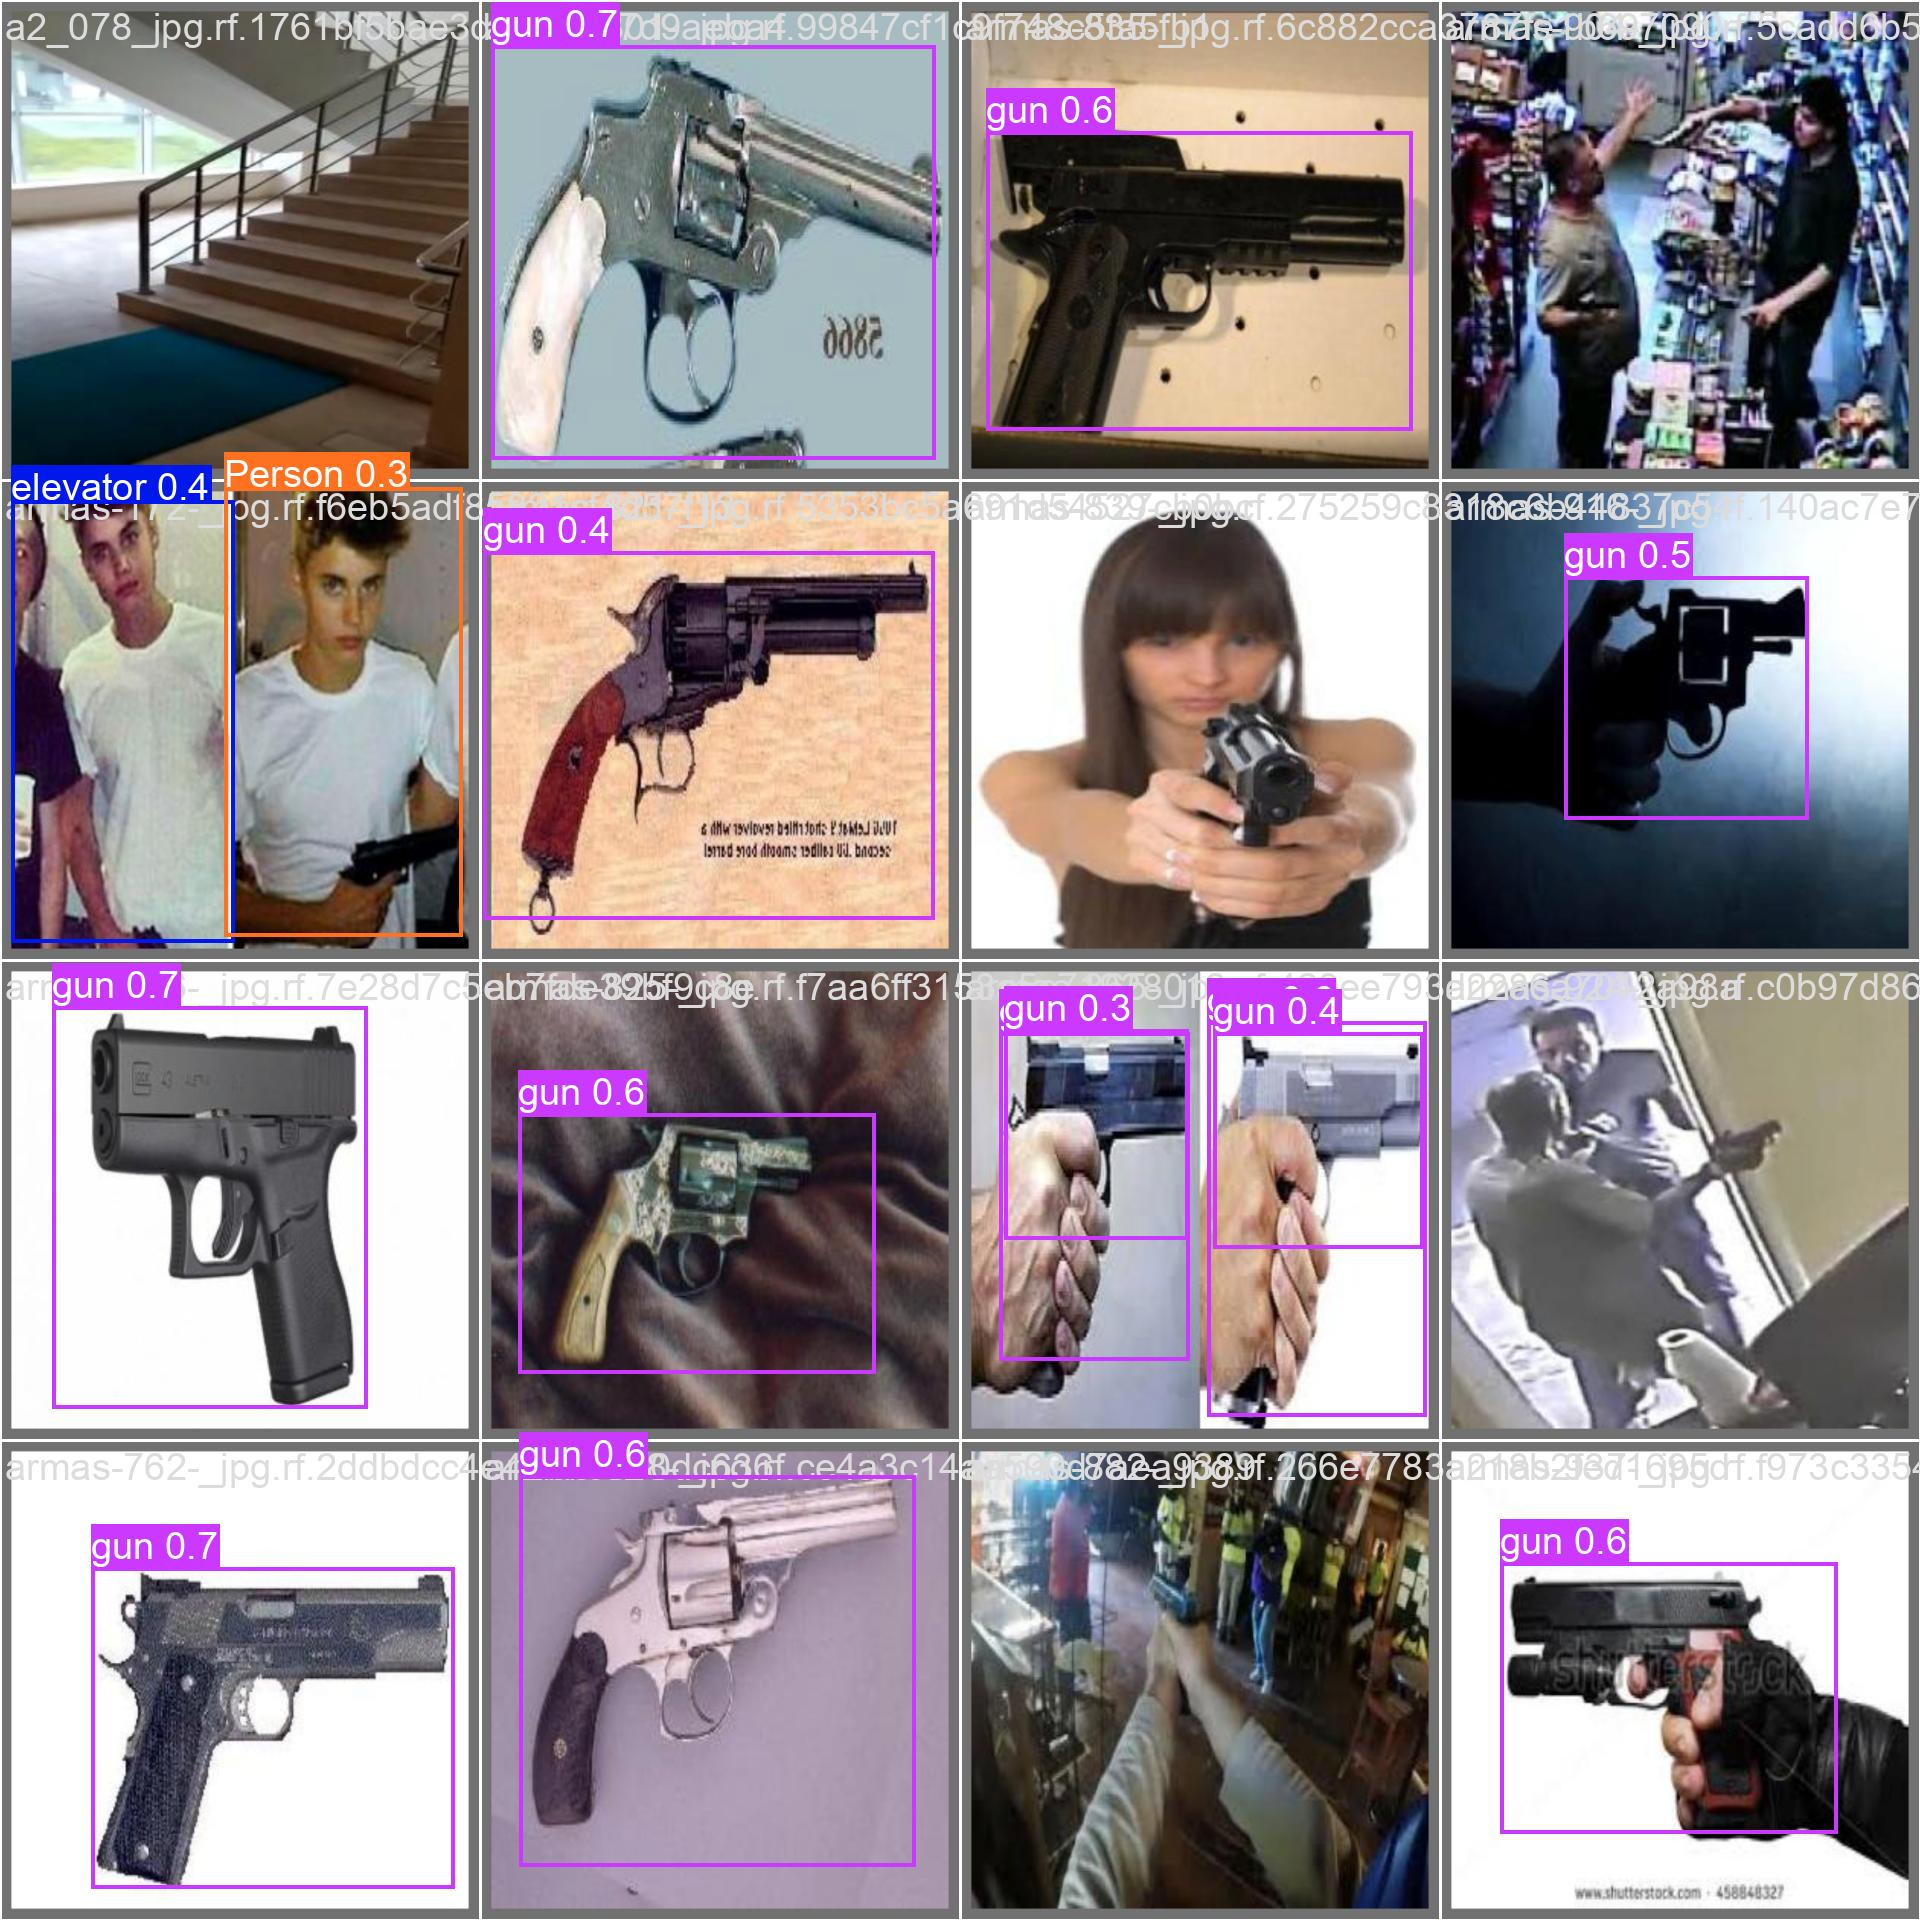

In [ ]:
import glob
from IPython.display import Image,display

for image_path in glob.glob(f'/content/runs/detect/train/val_batch2_pred.jpg'):
  display(Image(filename=image_path, height=600))
  print("\n")